               Model       MAE      RMSE    R2
0  Linear Regression  15190.92  19384.63  0.96
1      Random Forest  22163.65  27059.33  0.93
Saved model_evaluation.csv in outputs folder


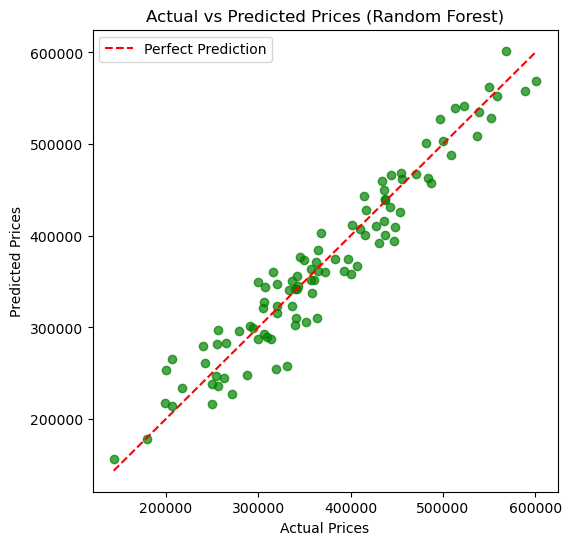

rf_predictions.png saved in: C:\Users\tarak\Documents\Naresh it\ML /outputs
Feature Importances:
     Feature  Importance
2  Area_sqft    0.526416
0   Bedrooms    0.395024
1  Bathrooms    0.048034
3        Age    0.023702
4     Garage    0.006823


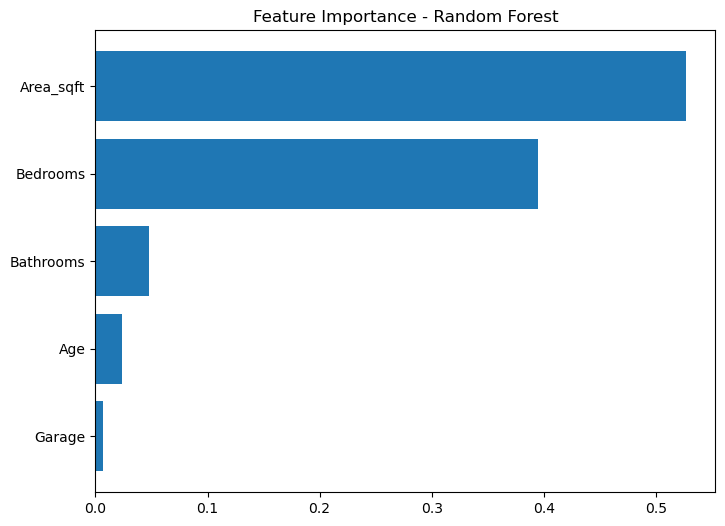

rf_feature_importance.png saved in outputs folder


In [2]:
# House Price Prediction using Machine Learning

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load Dataset
df = pd.read_csv("house_.csv")  # Make sure house.csv is in the same folder

# Drop missing values 
df = df.dropna()

# Features and target
X = df.drop("Price", axis=1)
y = df["Price"]

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 4. Evaluation Function
def evaluate(model):
    y_pred = model.predict(X_test)
    return {"MAE": mean_absolute_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "R2": r2_score(y_test, y_pred)}

# Evaluate both models
lr_metrics = evaluate(lr)
rf_metrics = evaluate(rf)

# 5. Compare Models
results = pd.DataFrame({"Model": ["Linear Regression", "Random Forest"],
                        "MAE": [lr_metrics["MAE"], rf_metrics["MAE"]],
                        "RMSE": [lr_metrics["RMSE"], rf_metrics["RMSE"]],
                        "R2": [lr_metrics["R2"], rf_metrics["R2"]]}).round(2)

print(results)

# Save evaluation to CSV
os.makedirs("outputs", exist_ok=True)
results.to_csv("outputs/model_evaluation.csv", index=False)
print("Saved model_evaluation.csv in outputs folder")

# 6. Scatter Plot - Actual vs Predicted (Random Forest)
y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color="green")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.legend()
plt.savefig("outputs/rf_predictions.png", dpi=300)
plt.show()

print("rf_predictions.png saved in:", os.getcwd(), "/outputs")

# 7. Feature Importance (Random Forest)
importances = rf.feature_importances_

feat_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(feat_df)

# Feature importance plot
plt.figure(figsize=(8,6))
plt.barh(feat_df["Feature"], feat_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.savefig("outputs/rf_feature_importance.png", dpi=300)
plt.show()

print("rf_feature_importance.png saved in outputs folder")